In [19]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [20]:
tips = sns.load_dataset("tips")

In [21]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>, <Axes: >]], dtype=object)

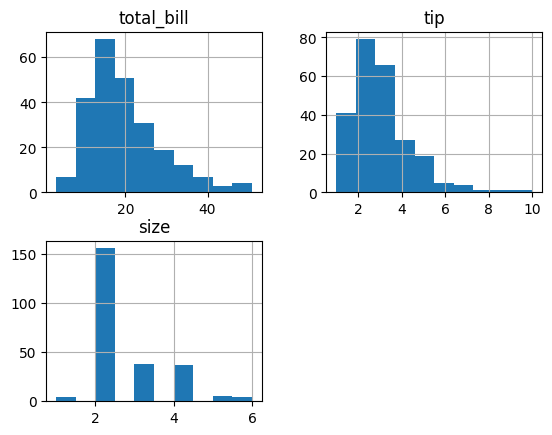

In [37]:
tips.hist()

<Axes: >

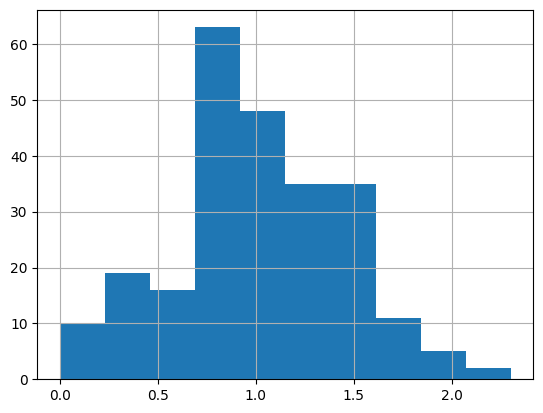

In [49]:

tips["logtip"]= np.log(tips["tip"])
m, s = stats.norm.fit(tips.logtip)
tips.logtip.hist()

In [39]:
ecdf=sm.distributions.ECDF(tips.logtip)

<function matplotlib.pyplot.show(close=None, block=None)>

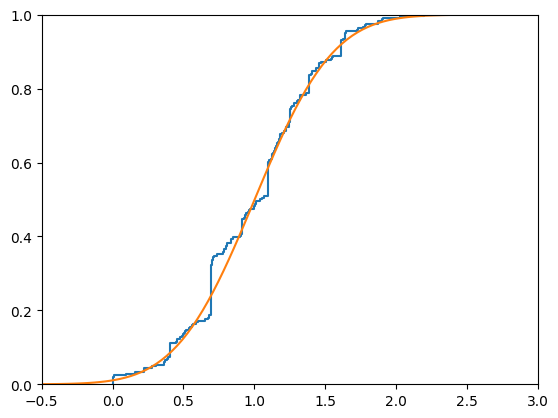

In [43]:
plt.axis([-0.5,3,0,1])
t1 = np.linspace(-0.6,3,100)
t2 = stats.norm.cdf(t1,loc=m, scale=s)
plt.step(ecdf.x,ecdf.y)
plt.plot(t1,t2)
plt.show

((array([-2.7660794 , -2.46319801, -2.29114787, -2.16825434, -2.07137443,
         -1.99075074, -1.9213089 , -1.86005848, -1.80508277, -1.75507658,
         -1.70910939, -1.66649348, -1.62670558, -1.58933792, -1.55406631,
         -1.52062855, -1.48880944, -1.45843008, -1.42934008, -1.40141172,
         -1.37453559, -1.34861722, -1.32357442, -1.29933525, -1.27583633,
         -1.25302156, -1.230841  , -1.20924999, -1.18820845, -1.16768023,
         -1.14763264, -1.12803597, -1.10886319, -1.09008958, -1.07169252,
         -1.0536512 , -1.03594646, -1.01856064, -1.00147737, -0.98468148,
         -0.96815887, -0.95189643, -0.93588192, -0.9201039 , -0.90455168,
         -0.88921522, -0.87408512, -0.85915251, -0.84440907, -0.82984693,
         -0.81545867, -0.80123728, -0.78717613, -0.77326892, -0.75950968,
         -0.74589275, -0.73241275, -0.71906453, -0.70584322, -0.69274417,
         -0.67976291, -0.66689521, -0.65413699, -0.64148438, -0.62893363,
         -0.61648119, -0.60412361, -0.

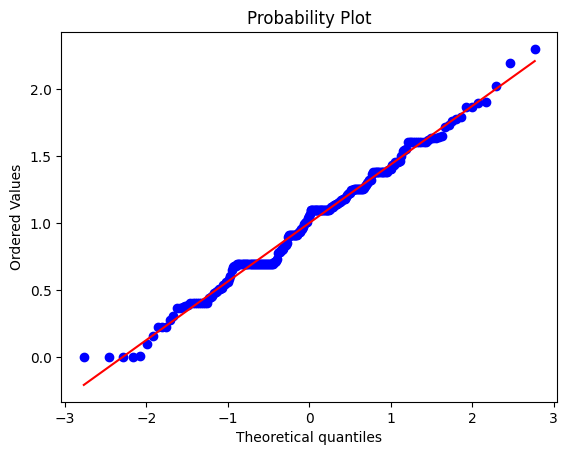

In [44]:
stats.probplot(tips.logtip,dist=stats.norm,plot= plt)

In [45]:
test1 = stats.skewtest(tips.logtip)
test1

SkewtestResult(statistic=0.49672635658719194, pvalue=0.619382033531661)

In [48]:
stats.kurtosistest(tips.logtip)

KurtosistestResult(statistic=-0.5011192568367938, pvalue=0.6162871950497942)

In [ ]:
stats.shapiro(tips.logtip)

# do czego sluza testy ze sa zerowo laternatywne, testy skosnosci, kurtozy, shapiro-wilka sprwdza skosnosc i kurtoze jednoczesnie
# 

ShapiroResult(statistic=0.9888468157351475, pvalue=0.056207717607826786)

In [51]:
norm1 = stats.norm(m,s)

In [53]:
stats.kstest(tips.logtip,norm1.cdf) # test kolomogorowa - smirnowa

KstestResult(statistic=0.0908346084933565, pvalue=0.033449454468464035, statistic_location=0.7080357930536959, statistic_sign=1)

In [54]:
norm2 = stats.norm(m,0.5)
stats.kstest(tips.logtip,norm2.cdf)

KstestResult(statistic=0.08360407822104635, pvalue=0.06229614845052134, statistic_location=0.6931471805599453, statistic_sign=-1)

In [56]:
n = tips.day.value_counts()
n

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [58]:
stats.chisquare(n)

Power_divergenceResult(statistic=43.704918032786885, pvalue=1.7434891890557612e-09)

In [60]:
stats.ttest_1samp(tips.logtip,popmean=1)

TtestResult(statistic=0.09088419733380054, pvalue=0.927659478192855, df=243)